In [7]:
!wget https://github.com/WiraDKP/unsupervised_learning/raw/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip

--2023-10-21 14:07:04--  https://github.com/WiraDKP/unsupervised_learning/raw/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WiraDKP/unsupervised_learning/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip [following]
--2023-10-21 14:07:04--  https://raw.githubusercontent.com/WiraDKP/unsupervised_learning/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24864134 (24M) [application/zip]
Saving to

In [9]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/lfw_people.csv     
  inflating: data/small_fmnist.csv   
  inflating: data/breast_cancer.csv  
  inflating: data/kompas.csv         
  inflating: __MACOSX/data/._kompas.csv  
   creating: data/sample_faces/
  inflating: data/sample_faces/.DS_Store  
   creating: __MACOSX/data/sample_faces/
  inflating: __MACOSX/data/sample_faces/._.DS_Store  
  inflating: data/sample_faces/hatta.png  
  inflating: data/sample_faces/soekarno2.png  
  inflating: data/sample_faces/soekarno1.png  


In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

!pip install jcopml
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

pd.options.display.max_columns = 100

In [12]:
df = pd.read_csv('/content/data/breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
# check distribution of data
df.target.value_counts(normalize=True)

1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

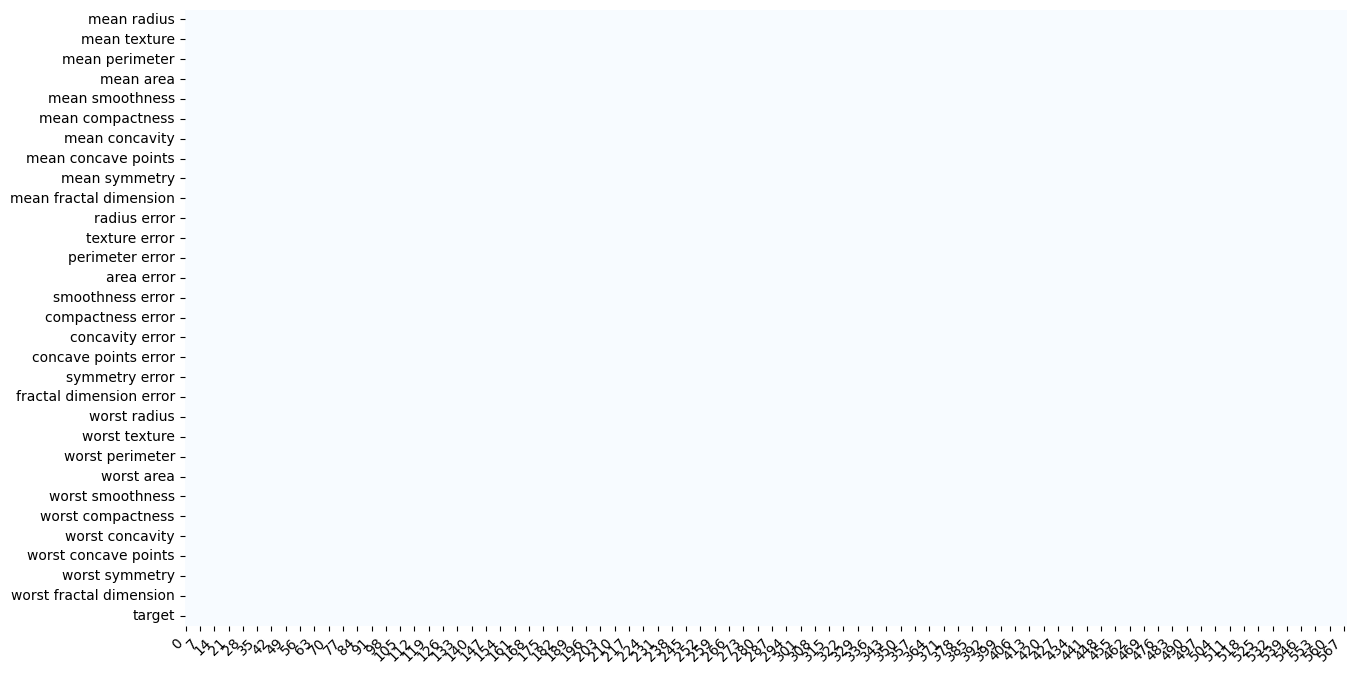

In [17]:
plot_missing_value(df)

In [18]:
X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=213)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

<h2> HOW PCA CAN HELP

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pca = PCA(n_components=2, whiten=True)

In [21]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
X_train_pca.shape

(455, 2)

the feature compressed into 2 representative feature

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning.space import Real, Integer

In [29]:
rsp.svm_params

{'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [34]:
pipeline.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median'))]),
                                    Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
          'mean smoothness', 'mean compactness', 'mean concavity',
          'mean concave points', 'mean symmetry', 'mean fractal dimension',
          'radius error', 'texture error', 'perimeter error', 'area error',
          'smoothness error', 'compactness error', 'concavity error',
          'concave points error', 'symmetry error', 'fractal dimension error',
          'worst radius', 'worst texture', 'worst perimeter', 'worst area',
          'worst smoothness', 'worst compactness', 'worst concavity',
          'worst concave points', 'worst symmetry', 'worst fractal dimension'],
         dtype='object'))])),
  ('pca', PCA()),
  ('algo', SVC(max

In [42]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA()),
    ('algo', SVC(max_iter=500))
])

params = {
    'pca__n_components': Integer(1, 30),
    'pca__whiten': [True, False],
    'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
    'algo__C': Real(low=-3, high=3, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 98.77700294007921, 'algo__gamma': 0.01879466824163846, 'pca__n_components': 28, 'pca__whiten': True}
1.0 0.9626321598698734 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


How to determine n_component -> cumulative explained variance

In [35]:
pca = PCA().fit(X_train)

In [36]:
pca.explained_variance_ratio_

array([9.79561447e-01, 1.87985711e-02, 1.40670897e-03, 1.24385298e-04,
       9.63820252e-05, 6.68618480e-06, 4.32218791e-06, 8.53128531e-07,
       3.30930886e-07, 1.95762794e-07, 7.85499163e-08, 1.85109461e-08,
       7.44671454e-09, 5.43477595e-09, 2.99342651e-09, 1.48746539e-09,
       8.59165930e-10, 5.43361736e-10, 4.10315083e-10, 3.67390944e-10,
       1.84519124e-10, 1.23874355e-10, 7.52091702e-11, 6.97301575e-11,
       3.96562985e-11, 3.01950343e-11, 7.64100829e-12, 6.01067800e-12,
       3.92535244e-12, 1.44682426e-12])

In [37]:
pca.explained_variance_

array([4.09756208e+05, 7.86355080e+03, 5.88434482e+02, 5.20310882e+01,
       4.03171575e+01, 2.79686970e+00, 1.80799615e+00, 3.56868589e-01,
       1.38430300e-01, 8.18887067e-02, 3.28578834e-02, 7.74323560e-03,
       3.11500368e-03, 2.27339815e-03, 1.25216759e-03, 6.22215358e-04,
       3.59394068e-04, 2.27291351e-04, 1.71637168e-04, 1.53681752e-04,
       7.71854147e-05, 5.18173577e-05, 3.14604300e-05, 2.91685274e-05,
       1.65884586e-05, 1.26307571e-05, 3.19627788e-06, 2.51430130e-06,
       1.64199759e-06, 6.05214941e-07])

Text(0, 0.5, 'Cumuative Explained Variance')

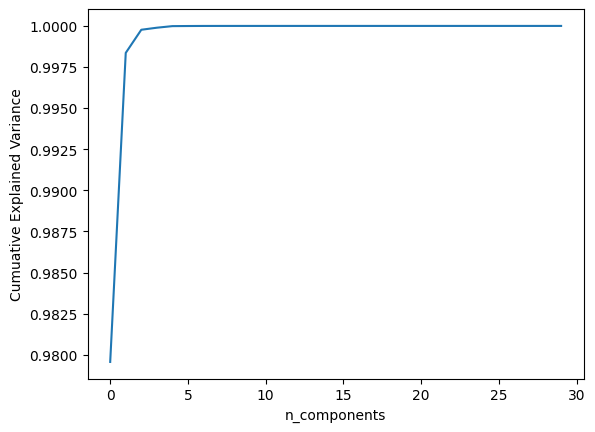

In [40]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_components")
plt.ylabel("Cumuative Explained Variance")

when n_component = 30, CEV is 100% no information is missing, when compressed into 25 it still a lot enough. Then when n_component < 5 start reducing, but not a lot.

In [44]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=2, whiten=True)),
    ('algo', SVC(max_iter=500))
])

params = {
    'pca__n_components': Integer(1, 30),
    'pca__whiten': [True, False],
    'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
    'algo__C': Real(low=-3, high=3, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 12.746711578215054, 'algo__gamma': 0.4374364439939081}
0.9296703296703297 0.9230277680957361 0.9649122807017544
